

# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction and data describtion </a></li>
<li><a href="#wrangling">Data Wrangling and cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>
## Introduction and data describtion 

we have csv file that includes data of patients in brazil and I am going to investiate this datset.This dataset has data of around 110k medical appointments and whether the patient showed up or not. The dataset comes has other information such as, gender, age, scheduling date , date of appointment, neighborhood, scholarship(healthcare), SMSs as well, and also chronic deseases such as hypertension, diabetes, and some habits like alcoholism, and if the patient is handicap (not further declared).

In [19]:
# import statements for all of the packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [20]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# checking the shape of the data set
df.shape


(110527, 14)

as we can see they ar 14 columns and 110527 rows

In [22]:
# checking for dublicates
df.duplicated().sum()

0

thee is no duplicate rows

In [23]:
# checking for unique values in PatientId coloumn
df['PatientId'].nunique()


62299

so there is 62299 nique patient id 

In [24]:
# checking for duplicated values
df.duplicated(['PatientId']).sum()


48228

so there is 48228 duplicate patient IDs , which along side the unique values creates the total number of the dataset


In [25]:
# dublicate patient id with the same status of showig or no showing
df.duplicated(['PatientId','No-show']).sum()

38710

so there is 38710 patients with the same show or no show status (will be dropped in cleaning phase)


In [26]:
df.duplicated(['AppointmentID','No-show']).sum()

0

In [27]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


looks like there is no missing values


In [28]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


so as we can see,
about 50% of people age ranges from 18 to 55 years old (from 25% to 75%),
there is one mistake in age values which is -1 and,
also there is 115 which is probably a mistake too,
about 25% only recieves an sms before appointment,



### Data Cleaning 

In [29]:
# identifying the -1 ae rows , the first method (query) did not work so i had to to it with the seconed method
# (i hope ypu can tell me why through assesment)
df.query('Age=="-1"')
df.loc[df['Age']==-1]



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [30]:
# the 115 as they is probably a mistke too
df.loc[df['Age']== 115]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [31]:
#droping the -1 row by index numbr
df.drop(index= 99832, inplace=True )


In [32]:
#droping based on the conition if the age is 115
agegroup= df[df['Age']== 115].index
df.drop(index= agegroup, inplace=True)

In [33]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


now the age range is more logical between 0 and 102


In [34]:
#correcting typos in column names
df.rename(columns= {'Hipertension': 'Hypertension'}, inplace= True)
df.rename(columns= {'No-show': 'No_show'}, inplace= True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [35]:
# removing dublicate with patient id and the same status of showig or no showing, 
# leaving dublicates if they differ in show or o show status
df.drop_duplicates(['PatientId','No_show'], inplace = True)
df.shape

(71813, 14)

In [36]:
# dropping columns that might be unnecesary and we wont ned it in the analysis
df.drop(['PatientId','AppointmentID','AppointmentDay','ScheduledDay'],axis=1, inplace= True)
df.head(1)


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### General look


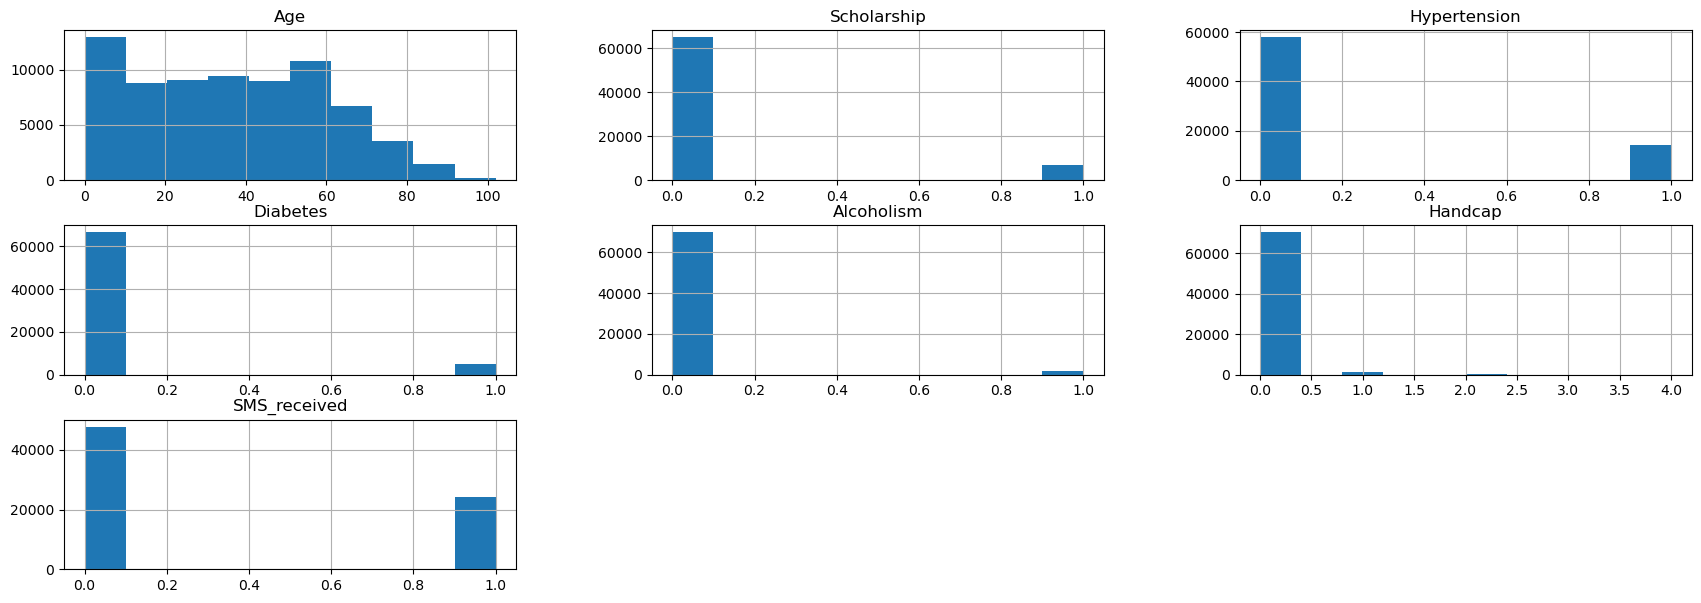

In [37]:
# general look on each field
df.hist(figsize=(21,7));

In [38]:
# we will devide all patients to 2 groups either show or noshow
show = df['No_show']== 'No'
noshow= df['No_show'] == 'Yes'
df[show].count(), df[noshow].count()


(Gender           54151
 Age              54151
 Neighbourhood    54151
 Scholarship      54151
 Hypertension     54151
 Diabetes         54151
 Alcoholism       54151
 Handcap          54151
 SMS_received     54151
 No_show          54151
 dtype: int64,
 Gender           17662
 Age              17662
 Neighbourhood    17662
 Scholarship      17662
 Hypertension     17662
 Diabetes         17662
 Alcoholism       17662
 Handcap          17662
 SMS_received     17662
 No_show          17662
 dtype: int64)

so there is 54151 who attended and 17662 who did not attend

### Does SMS affect attendance?



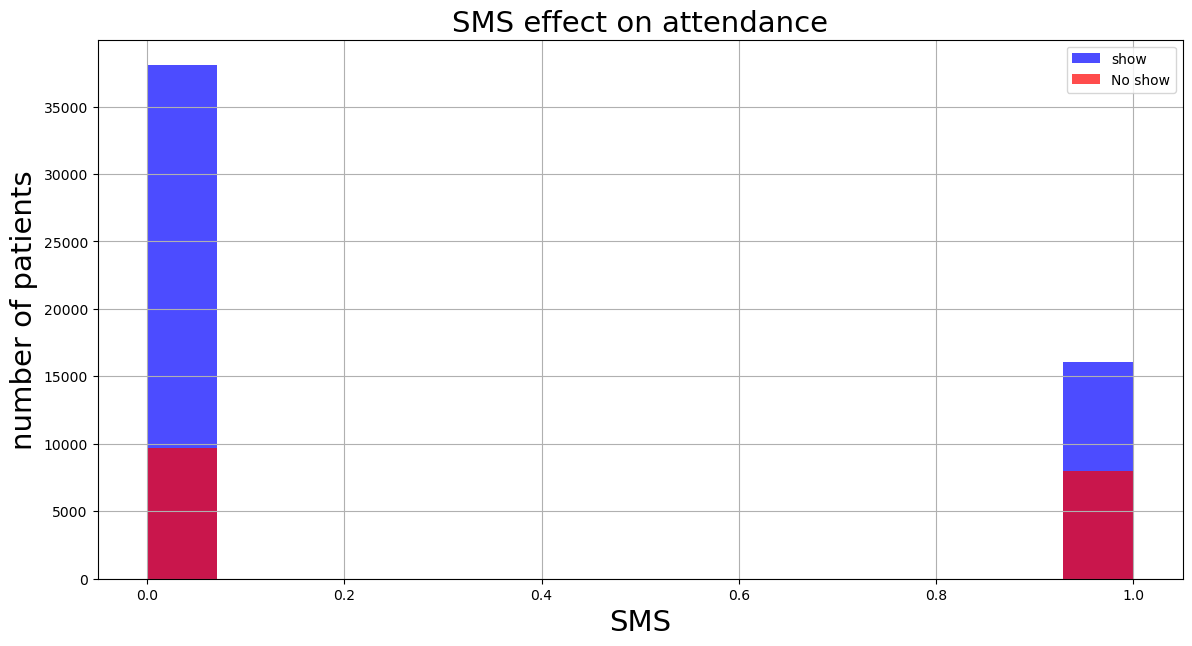

In [39]:
#investigating sms and its relationship with showing
#  or no showing
def attendance(df,column_name,attended,absent):
    plt.figure(figsize=[14,7])
    df[column_name][show].hist(alpha= 0.7,bins=14,color= 'blue' , label= 'show',ylabelsize=10);
    df[column_name][noshow].hist(alpha= 0.7,bins=14,color= 'red' , label= 'No show',ylabelsize=10);
    plt.legend();
    plt.title('SMS effect on attendance',fontsize=21)
    plt.xlabel('SMS',fontsize=21)
    plt.ylabel('number of patients',fontsize=21)
attendance(df,'SMS_received',show,noshow)


look like majorty of patients attended with no sms
and patients who received sms are less likely to attend 

# Does a handcap patients attend more or less?

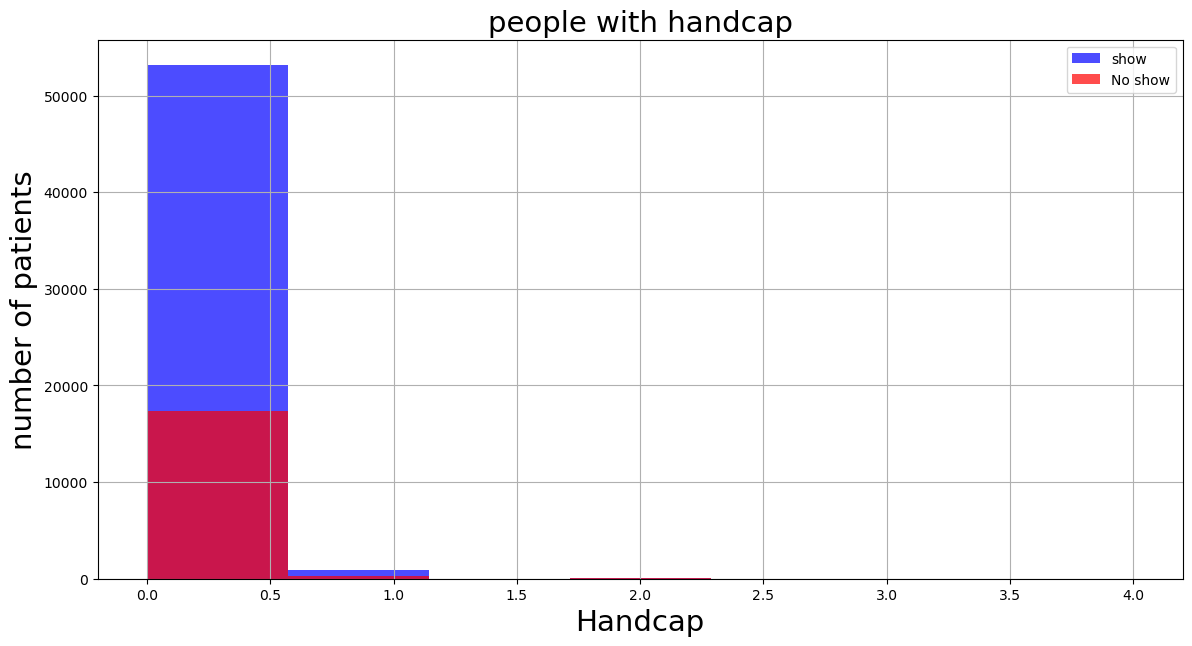

In [40]:
#investigating Handcap patients
def attendance(df,column_name,attended,absent):
    plt.figure(figsize=[14,7])
    df[column_name][show].hist(alpha= 0.7,bins=7,color= 'blue' , label= 'show',ylabelsize=10);
    df[column_name][noshow].hist(alpha= 0.7,bins=7,color= 'red' , label= 'No show',ylabelsize=10);
    plt.legend();
    plt.title('people with handcap',fontsize=21)
    plt.xlabel('Handcap',fontsize=21)
    plt.ylabel('number of patients',fontsize=21)
attendance(df,'Handcap',show,noshow)



there is no statistical significance between people who have handicaps and people who dont in showing or no showig

# Does alcohol affect patients attendance?


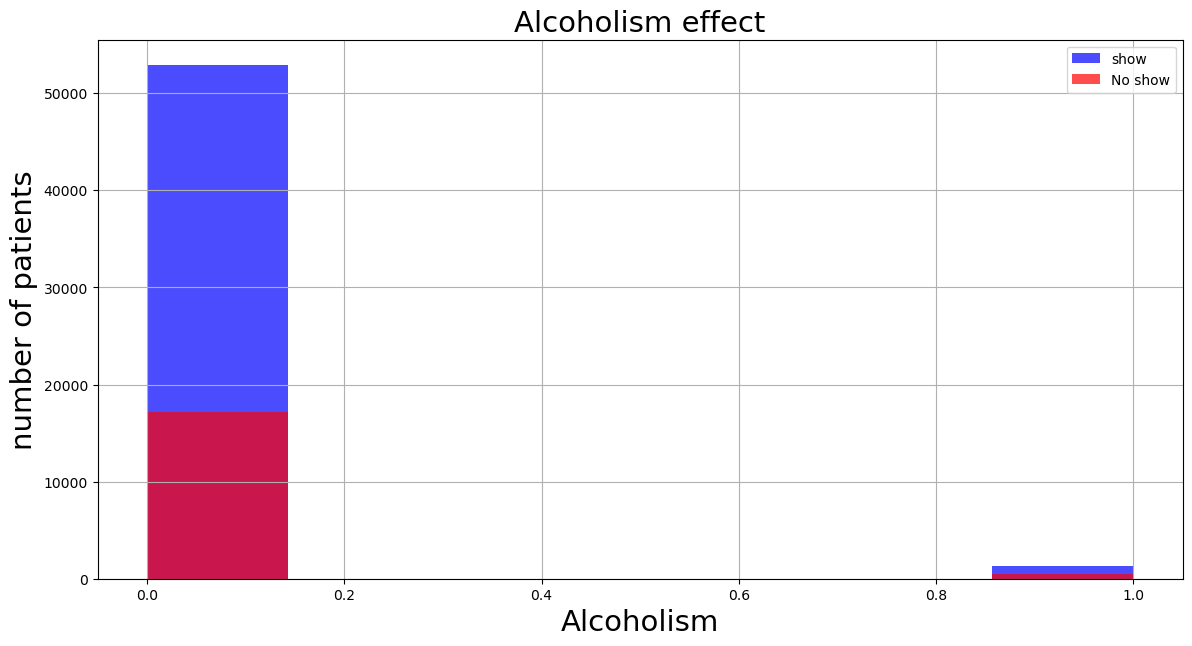

In [41]:
#investigating alcohlic patient
def attendance(df,column_name,attended,absent):
    plt.figure(figsize=[14,7])
    df[column_name][show].hist(alpha= 0.7,bins=7,color= 'blue' , label= 'show',ylabelsize=10);
    df[column_name][noshow].hist(alpha= 0.7,bins=7,color= 'red' , label= 'No show',ylabelsize=10);
    plt.legend();
    plt.title('Alcoholism effect',fontsize=21)
    plt.xlabel('Alcoholism',fontsize=21)
    plt.ylabel('number of patients',fontsize=21)
attendance(df,'Alcoholism',show,noshow)



looks like most patients are not alcoholic, and alcohol has no clear effect on showing

# Does age affect attendance?

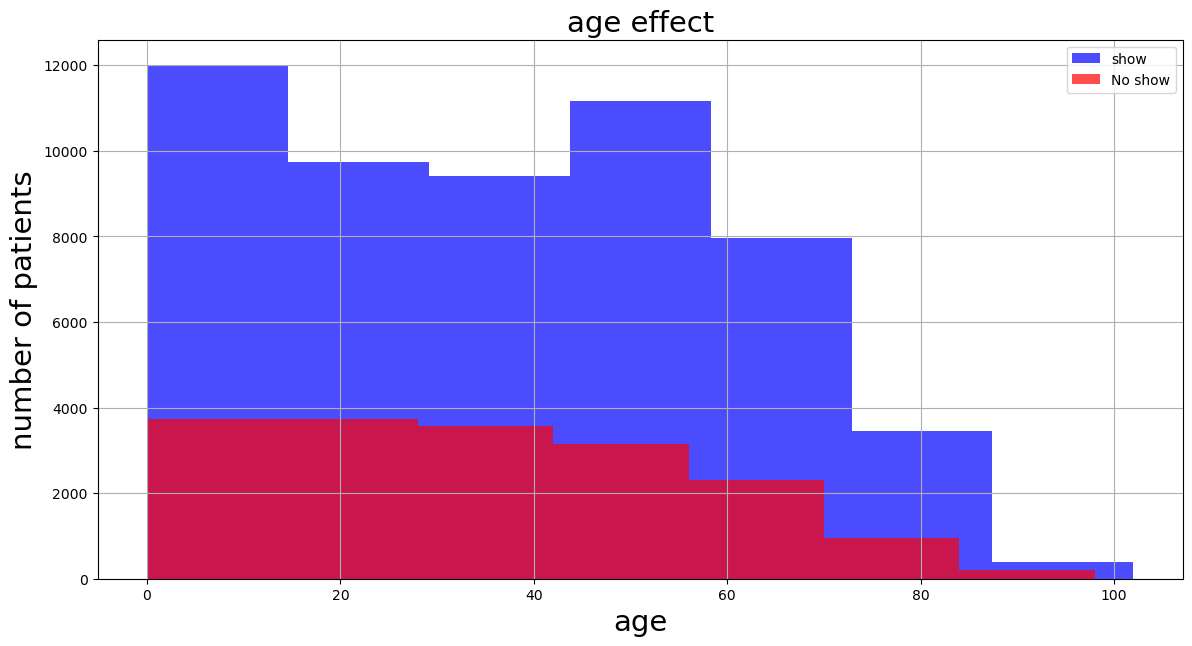

In [42]:
#investigating age groups
def attendance(df,column_name,attended,absent):
    plt.figure(figsize=[14,7])
    df[column_name][show].hist(alpha= 0.7,bins=7,color= 'blue' , label= 'show',ylabelsize=10);
    df[column_name][noshow].hist(alpha= 0.7,bins=7,color= 'red' , label= 'No show',ylabelsize=10);
    plt.legend();
    plt.xlabel('age',fontsize=21)
    plt.ylabel('number of patients',fontsize=21)
    plt.title('age effect',fontsize=21)
attendance(df,'Age',show,noshow)



people with age group 0-10 years old attends the most which means that parents are taking good care of their children,also people from 43 to 57 attended at a high rate too.

it is also noticable that atending patients decreses after 60 years old




# Does chronic deseases with age effect on attending??

Text(0.5, 1.0, 'Effect of chronic deseases with mean ages on number of patient attending')

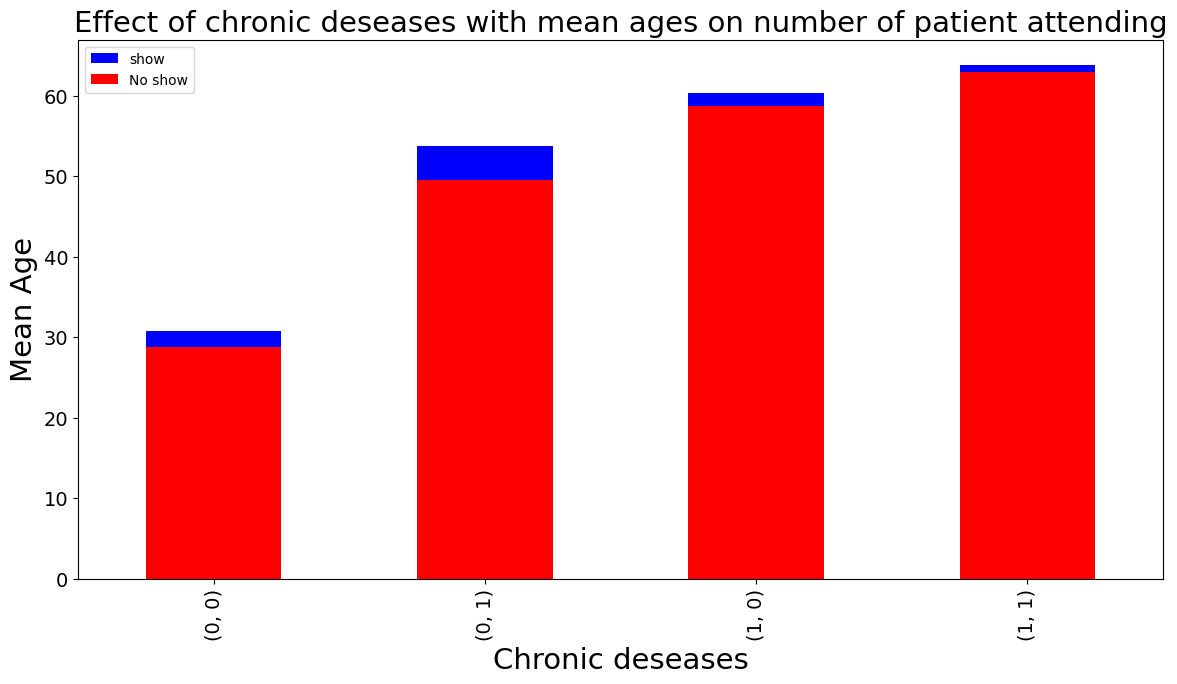

In [43]:
#investigating effect of mean ages with chronic deseases 
plt.figure(figsize=[14,7])
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color='red',label='No show')
plt.legend();
plt.xlabel('Chronic deseases',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylabel('Mean Age',fontsize=21)
plt.title('Effect of chronic deseases with mean ages on number of patient attending',fontsize=21)




most of patients with hronic deseases does not attend ,there is no significance here except that people wih diabetes attend a little more than patients with hypertension and patients with both and they have a less mean age

In [44]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']


(Hypertension  Diabetes
 0             0           30.711373
               1           53.701370
 1             0           60.263476
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.762705
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

# Deos gender affect the number of attending patients?

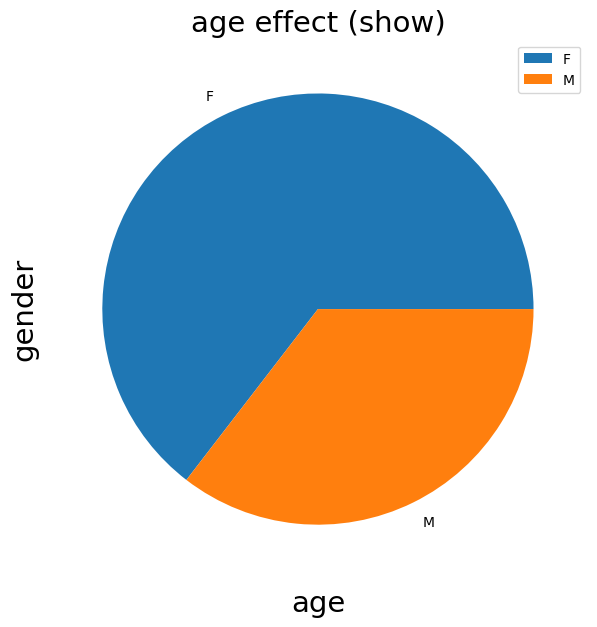

In [45]:
#investigating Genders (show)
def attendance(df,column_name,attended):
    plt.figure(figsize=[7,7])
    df[column_name][show].value_counts().plot(kind='pie', label= 'show');
    plt.legend();
    plt.xlabel('age',fontsize=21)
    plt.ylabel('gender',fontsize=21)
    plt.title('age effect (show)',fontsize=21)
attendance(df,'Gender',show)



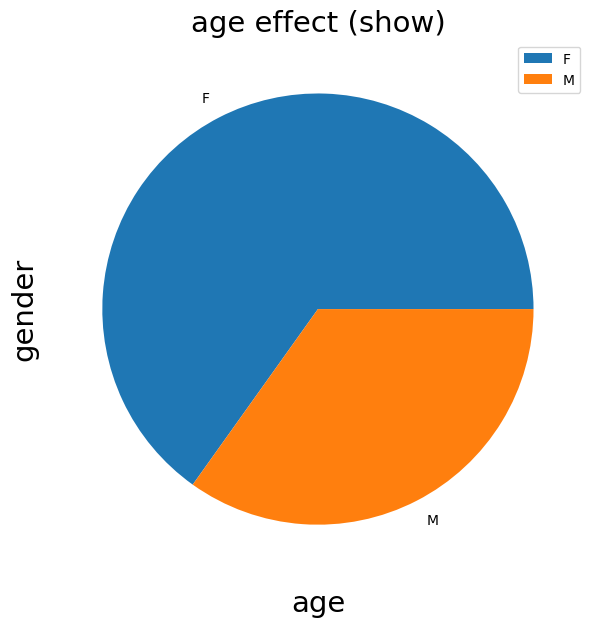

In [46]:
#investigating Genders (no show)
def attendance(df,column_name,noshow):
    plt.figure(figsize=[7,7])
    df[column_name][noshow].value_counts().plot(kind='pie', label= 'show');
    plt.legend();
    plt.xlabel('age',fontsize=21)
    plt.ylabel('gender',fontsize=21)
    plt.title('age effect (show)',fontsize=21)
attendance(df,'Gender',noshow)





females are showing more and also not showing more, so it looks like there is no significance here, but it seems that females are more ythn males in this sample

In [47]:
df['Gender'].value_counts()

F    46463
M    25350
Name: Gender, dtype: int64

# Does Gender with age has any relatioship with the Attendance?

Text(0.5, 1.0, 'Mean Age and Gender')

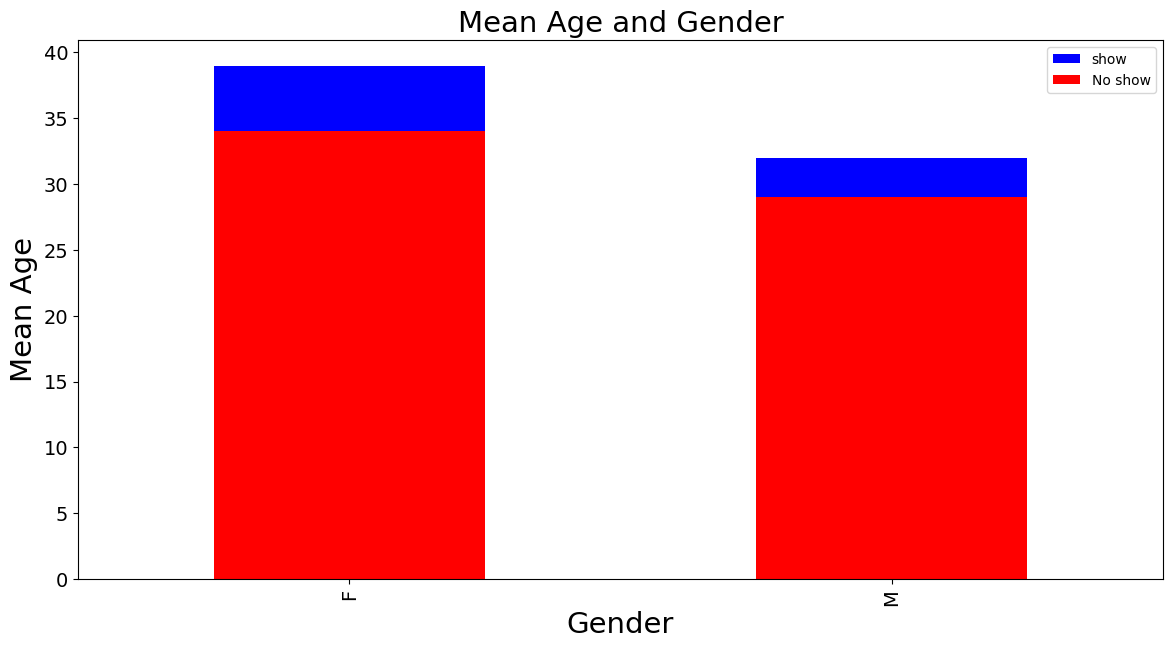

In [48]:
#investigating effect of age and gender 
plt.figure(figsize=[14,7])
df[show].groupby('Gender')['Age'].median().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender')['Age'].median().plot(kind='bar',color='red',label='No show')
plt.legend();
plt.xlabel('Gender',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylabel('Mean Age',fontsize=21)
plt.title('Mean Age and Gender',fontsize=21)




there is no noticable  differences between genders in most ages

In [49]:
print(df[show].groupby('Gender')['Age'].median(),df[noshow].groupby('Gender')['Age'].median())
print(df[show].groupby('Gender')['Age'].mean(),df[noshow].groupby('Gender')['Age'].mean())



Gender
F    39.0
M    32.0
Name: Age, dtype: float64 Gender
F    34.0
M    29.0
Name: Age, dtype: float64
Gender
F    39.125951
M    33.766269
Name: Age, dtype: float64 Gender
F    36.058149
M    31.220400
Name: Age, dtype: float64


## Does Neighborhood Has any effect on the attendance ?

Text(0.5, 1.0, 'Nighbourhood effect on attendance')

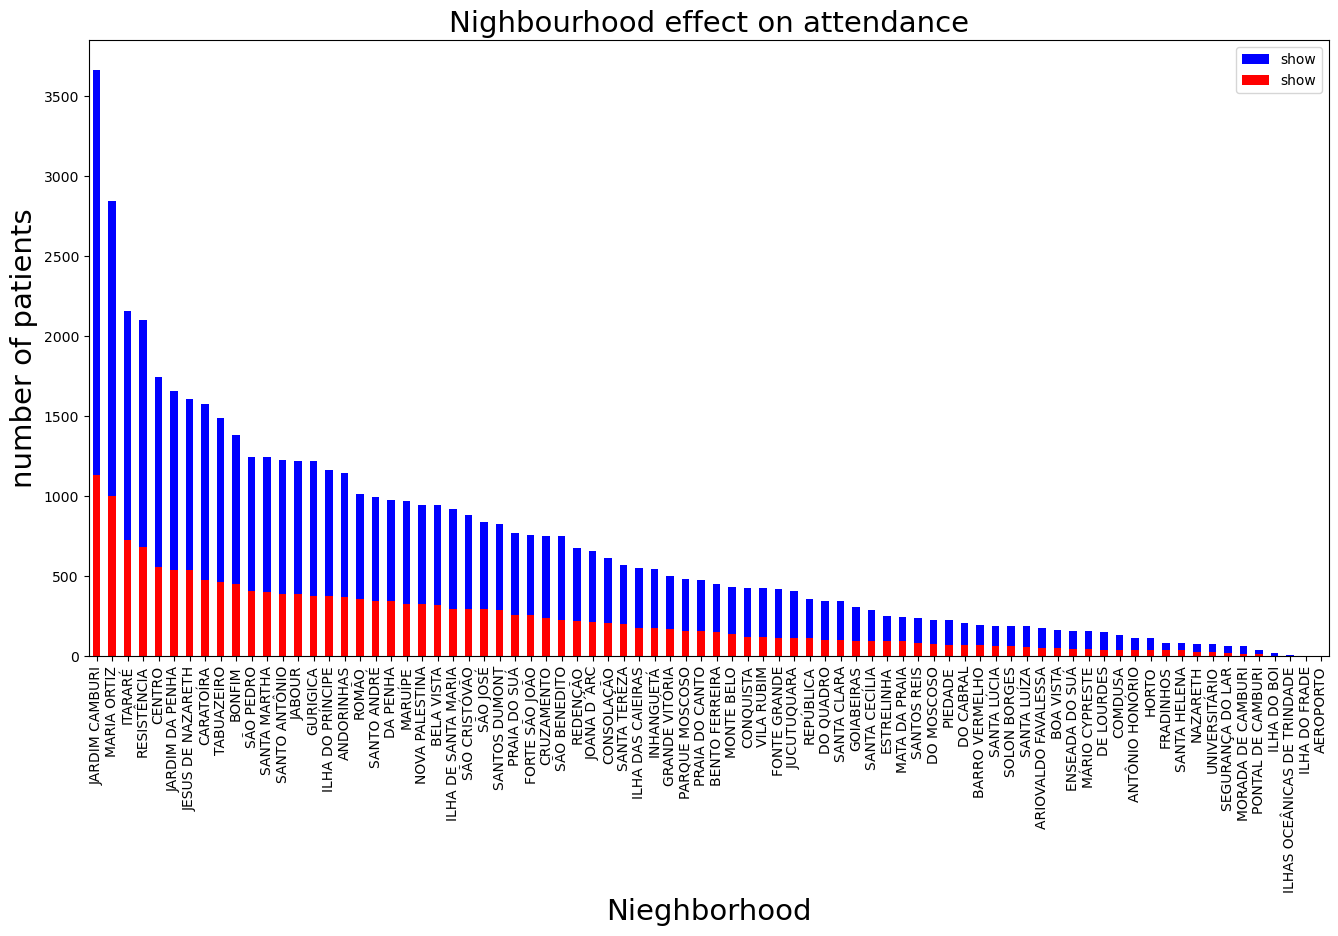

In [50]:
plt.figure(figsize=[16,8])
df.Neighbourhood[show].value_counts().plot(kind='bar', label= 'show', color= 'blue');
df.Neighbourhood[noshow].value_counts().plot(kind='bar', label= 'show',color='red');
plt.legend();
plt.xlabel('Nieghborhood',fontsize=21)
plt.ylabel('number of patients',fontsize=21)
plt.title('Nighbourhood effect on attendance',fontsize=21)



Neighborhood has major effect on many neighborhoods 

# Is there a relationship between SMS responses and niebourhoods?



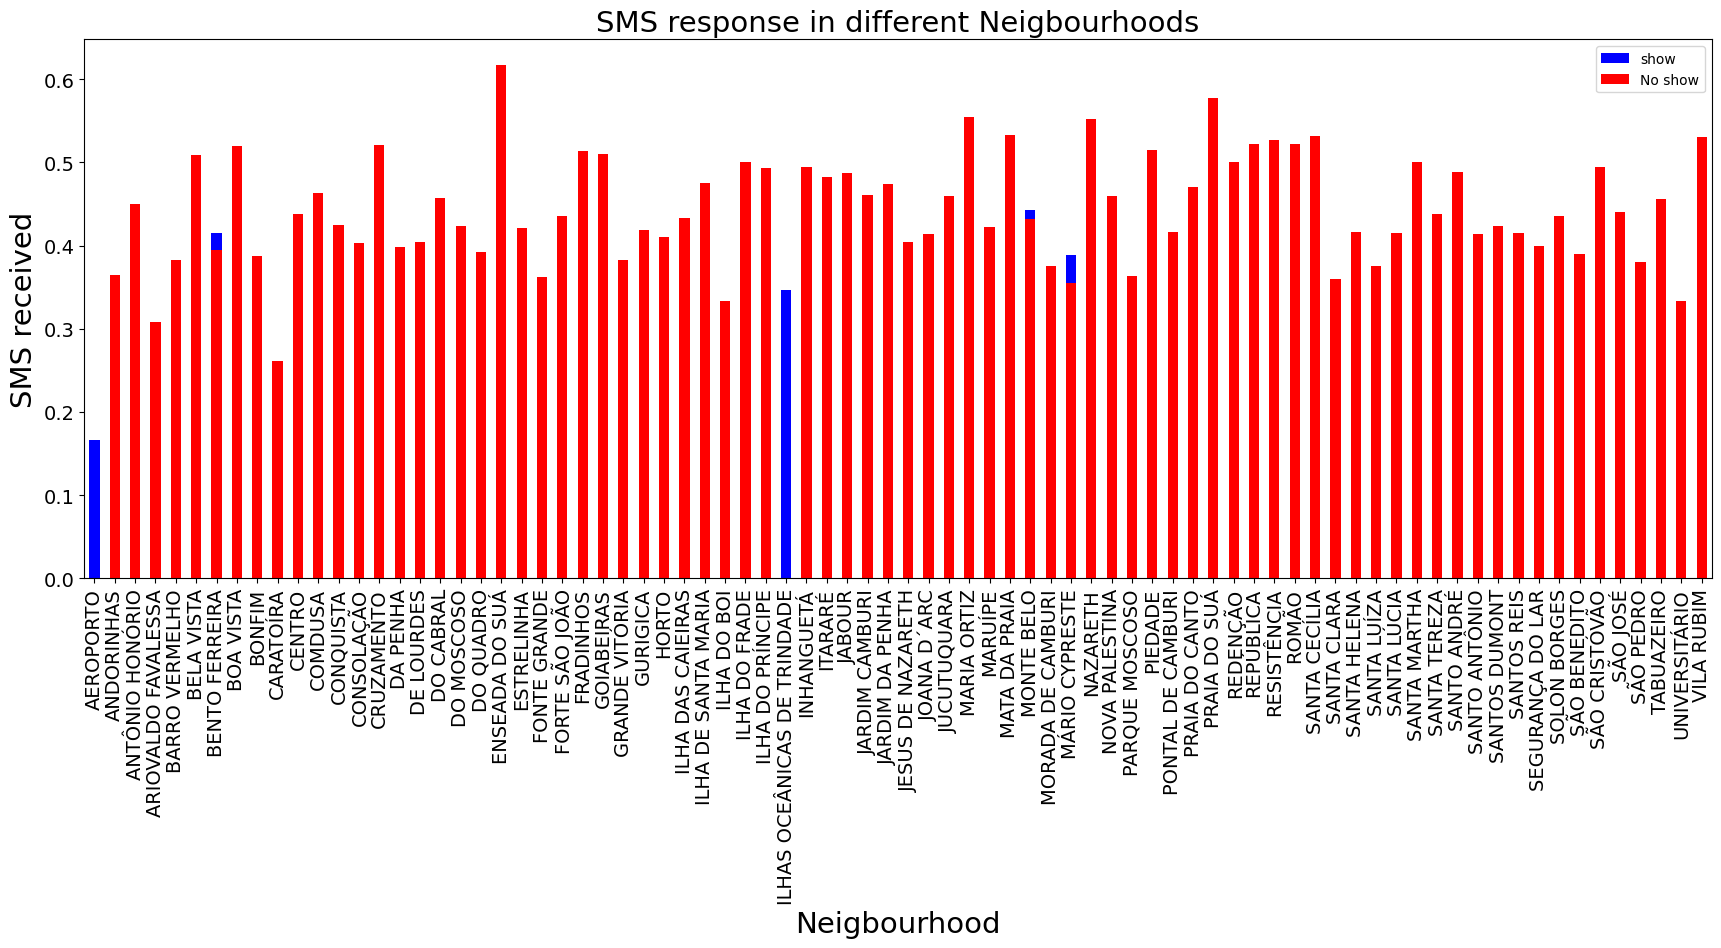

In [51]:
#investigating SMS responses in neibouhoods
plt.figure(figsize=[21,7])
df[show].groupby('Neighbourhood')['SMS_received'].mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood')['SMS_received'].mean().plot(kind='bar',color='red',label='No show')
plt.legend();
plt.xlabel('Neigbourhood',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylabel('SMS received',fontsize=21)
plt.title('SMS response in different Neigbourhoods',fontsize=21);

there is some neighnorood that patients highl responded to sms,and this needs to be investigated, maybe sms campaign is deffirent from neighborhood to another

## Does more old patients tend to show if they have a scholarship?


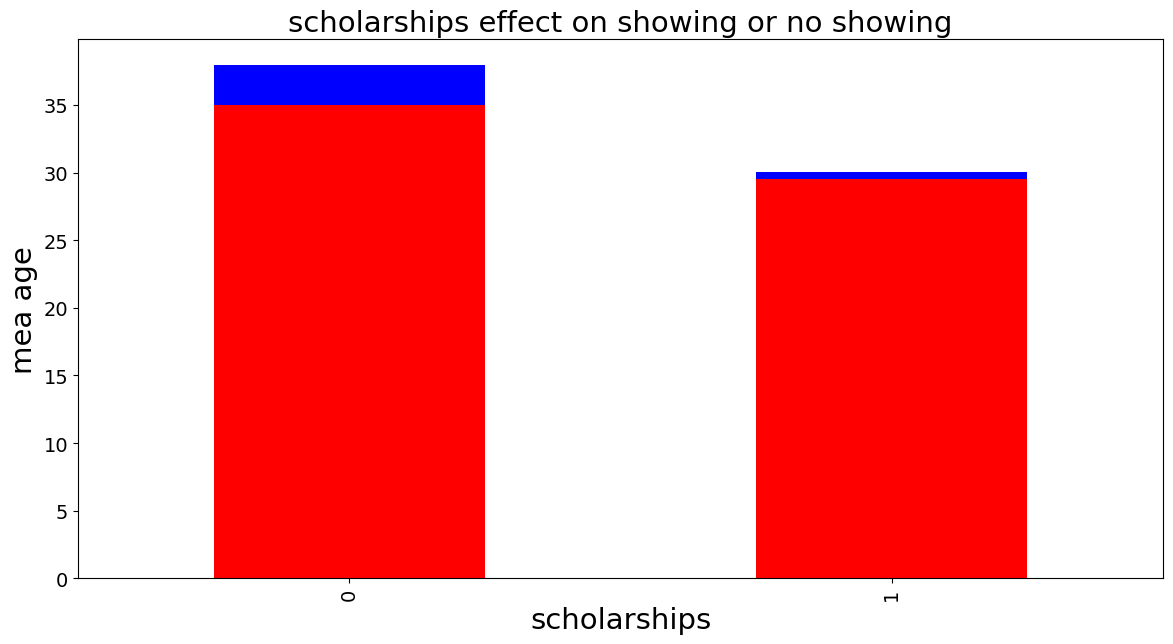

In [52]:
#investigating effect of scholarships and mean age
plt.figure(figsize=[14,7])
oldage= df[df['Age'] >= 50]
df[show].groupby('Scholarship')['Age'].mean().plot(kind='bar',color='blue',label='show')
#df[show].groupby('Scholarship')[oldage].mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Scholarship')['Age'].mean().plot(kind='bar',color='red',label='show')
plt.xlabel('scholarships',fontsize=21)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.ylabel('mea age',fontsize=21)
plt.title('scholarships effect on showing or no showing',fontsize=21);




tried to investigate old ages and the effect of sholarships on them but i coul not specify an age group, if you can tell me how i will be so thankful 
( I made a variable called oldage and tried to plot it with scholarship but it gives me an error) 

<a id='conclusions'></a>
## Conclusions
1-we discovered that nighborhood has great effect on neighborhoods , also SMSs has great effect on some neighborhood while it has almost no effect on most of the neighborhoods(patients with no sms attend ore) which might raise an investigation on this sms system  
2-age also has clea effect children from 0-10 attend more which means that parents are takng care of their children, while attending decreases after the ge of 60.  
3-gender and gender with age has no clear effect as females are more than males in the dataset so they are attending more, also handcap and alcohol has no clear effect  
4-fially I tried to build comparison between peole with old age and if scholarship might make them attend more (I really and gender with ageeneed help doing this)  




# Limitations:

1-Missing data like patient series and whether he is employed or not.  
2-The dataset covers a short period of only 40 days , the longer the period, the better the reults
